# Matplotlib 

matplotlib is standard python visualization library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. matplotlib can be used in Python scripts, the Python and IPython shell (ala MATLAB or Mathematica), web application servers, and six graphical user interface toolkits.

### Plotting in *pandas*

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.

### List of Plots

There are many other plotting styles available, all of which can be accessed by passing `kind` keyword to `plot()`. The full list of available plots are as follows:

*   `line` for line plots
*   `bar` for vertical bar plots
*   `barh` for horizontal bar plots
*   `hist` for histogram
*   `box` for boxplot
*   `kde` or `density` for density plots
*   `area` for area plots
*   `pie` for pie plots
*   `scatter` for scatter plots
*   `hexbin` for hexbin plot


### Import Library

In [33]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### Read data into dataframe

Data

In [2]:
df = pd.read_csv('immigration.csv')
df.head()

,Year,Africa,Asia,Europe,Latin America and the Caribbean,Northern America,Oceania
0,1980,3951,31025,39760,13081,9378,1942
1,1981,4363,34314,44802,15215,10030,1839
2,1982,3819,30214,42720,16769,9074,1675
3,1983,2671,24696,24638,15427,7100,1018
4,1984,2639,27274,22287,13678,6661,878


In [3]:
df.shape

(34, 7)

### Line Plot - Scripting layer

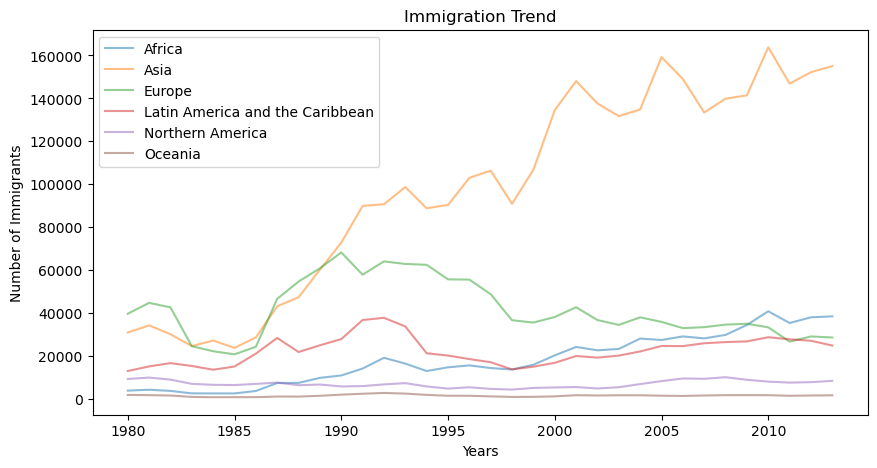

In [73]:
df.plot(kind='line',x='Year', alpha=0.5, figsize=(10, 5))
plt.title('Immigration Trend')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Line Plot - Artist layer

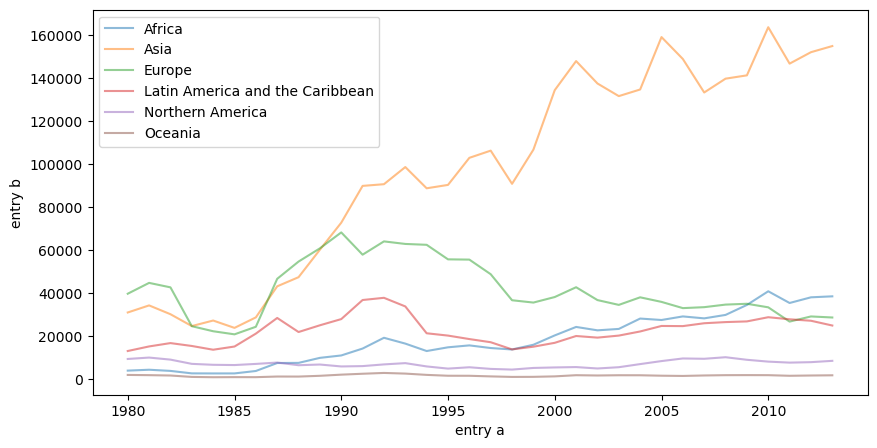

In [99]:
ax = df.plot(kind='line',x='Year', alpha=0.5, figsize=(10, 5))
ax.set_xlabel('entry a')
ax.set_ylabel('entry b');

### Bar 

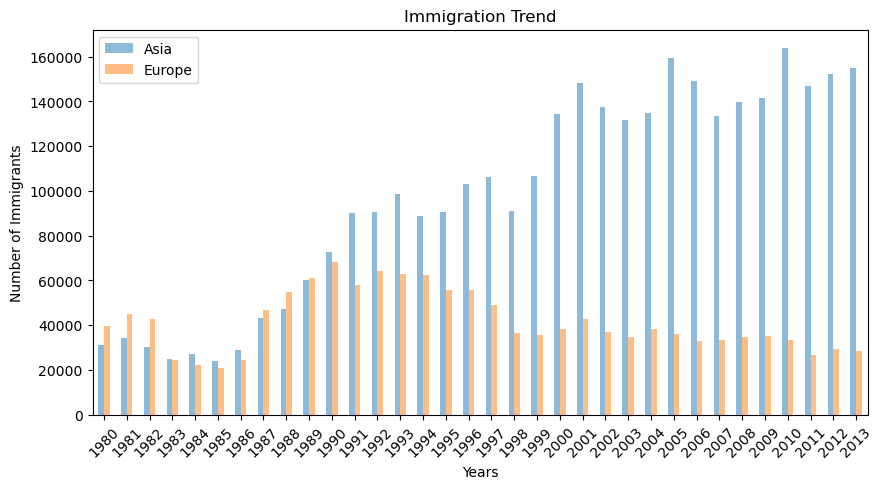

In [125]:
df.plot(kind='bar', x='Year', y=['Asia','Europe'], alpha=0.5, figsize=(10, 5))
plt.title('Immigration Trend')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.show()

### Dataset 2

Data

In [180]:
df = pd.read_csv('exams.csv').set_index('gender')

In [181]:
df.head()

,math score,reading score,writing score
gender,,,
male,47,55,53
female,68,74,83
female,47,57,55
male,48,48,39
female,38,46,41


### KDE plot

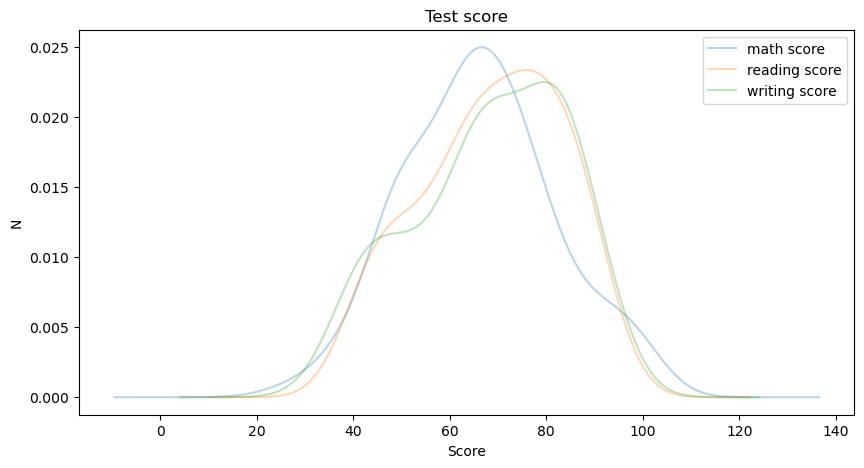

In [176]:
df.plot(kind='kde', alpha=0.3, figsize=(10, 5))
plt.title('Test score')
plt.ylabel('N')
plt.xlabel('Score')
plt.show()

### Hist plot

In [182]:
df['mean']=df.mean(axis=1)
df.head()

,math score,reading score,writing score,mean
gender,,,,
male,47,55,53,51.666667
female,68,74,83,75.000000
female,47,57,55,53.000000
male,48,48,39,45.000000
female,38,46,41,41.666667


#### Bin size control

Text(0.5, 0, 'Score')

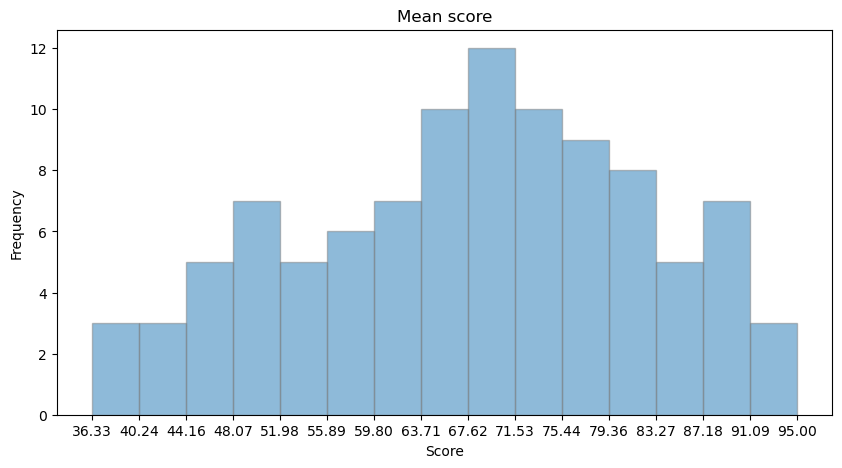

In [184]:
# np.histogram to make binsize
bin_size = 15
count, bin_edges = np.histogram(df['mean'],bin_size)

df['mean'].plot(kind='hist', alpha=0.5, figsize=(10, 5),
                bins=bin_size, xticks=bin_edges, edgecolor='gray')
plt.title('Mean score')
plt.xlabel('Score')
#plt.xticks(bin_edges)

Text(0.5, 0, 'Score')

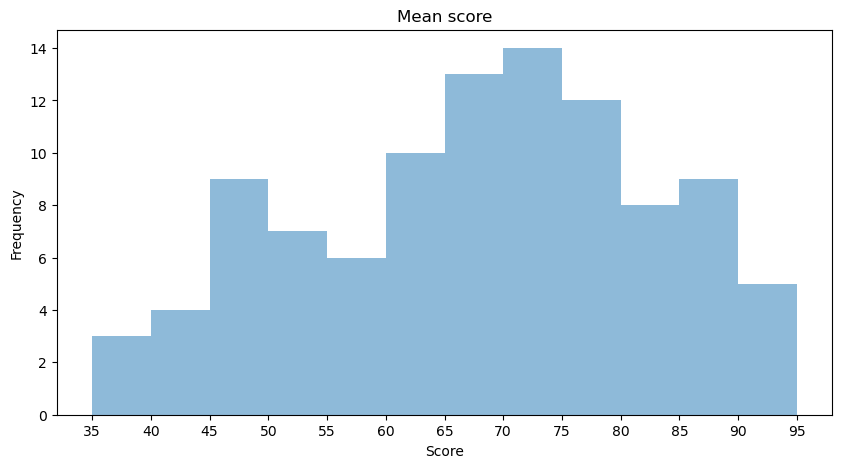

In [185]:
# use list to define bin
bin = np.arange(35,100,5)

df['mean'].plot(kind='hist', alpha=0.5, figsize=(10, 5), 
                bins=bin, xticks=bin)
plt.title('Mean score')
plt.xlabel('Score')

#### two histograms

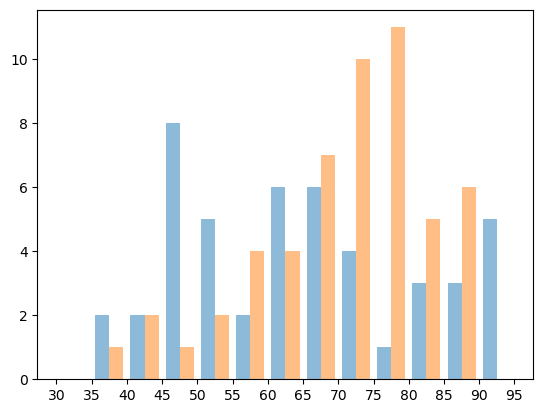

In [120]:
# Filter dataframe and seperate male and female
df_male = df[df.index=='male']
df_female = df[df.index=='female']

# construct data
data = [df_male['mean'],df_female['mean']]

# construct bin
bin = np.arange(30,100,5)

plt.hist(data, bins=bin, alpha=0.5)
plt.xticks(bin);

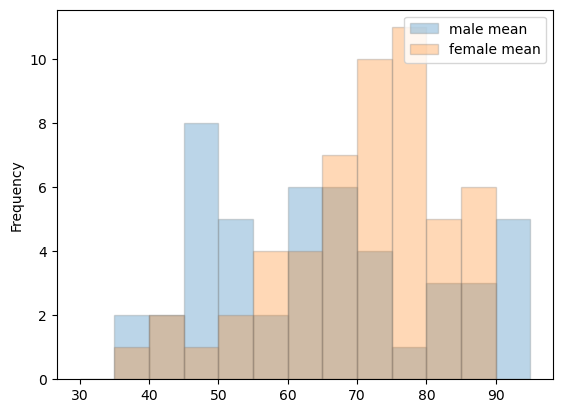

In [118]:
df_male['mean'].plot(kind='hist',bins=bin, alpha=0.3, label='male mean',edgecolor='gray')
df_female['mean'].plot(kind='hist',bins=bin, alpha=0.3, label='female mean',edgecolor='gray')
plt.legend(loc='upper right');

### Pie 1

In [187]:
df = pd.read_csv('exams.csv')
df.head()

,gender,math score,reading score,writing score
0,male,47,55,53
1,female,68,74,83
2,female,47,57,55
3,male,48,48,39
4,female,38,46,41


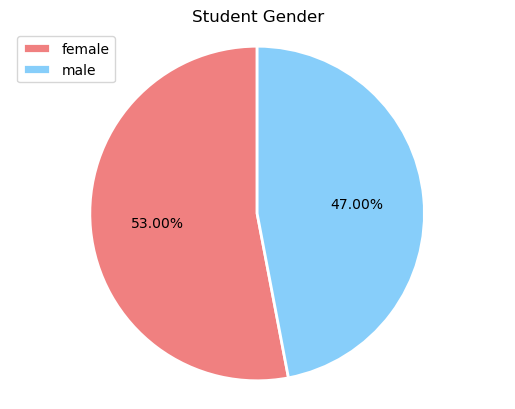

In [198]:
df_gender = df.gender.value_counts()
df_gender

df_gender.plot(kind='pie',
               autopct='%1.2f%%', # add in percentages
               pctdistance=0.6,
               startangle=90,
               colors=['lightcoral', 'lightskyblue'],
               wedgeprops={"edgecolor":'white','linewidth': 2},
               labels=None)

plt.title('Student Gender')
plt.axis('equal') # Sets size of x and y axis same
plt.legend(labels=df_gender.index, loc='upper left') 
plt.ylabel(None)

plt.show()

### Pie 2

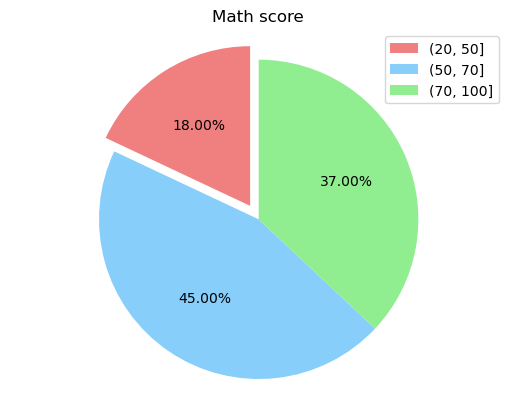

In [199]:
# read csv to Dataframe
df = pd.read_csv('exams.csv')

# bin math score to [20-50, 50-70, 70-100]
df['math bin'] = pd.cut(df['math score'],[20, 50, 70, 100])
df_bin = df['math bin'].value_counts()

# sort by index
df_bin.sort_index(inplace=True)

# pie plot
df_bin.plot(kind='pie',
            autopct='%1.2f%%', # add in percentages
            pctdistance=0.6,
            startangle=90,
            colors=['lightcoral', 'lightskyblue', 'lightgreen'],
            explode=[0.1,0,0],
            labels=None)

plt.title('Math score')
plt.axis('equal') # Sets size of x and y axis same
plt.legend(labels=df_bin.index, loc='upper right') 
plt.ylabel(None)
plt.show()

### Bar

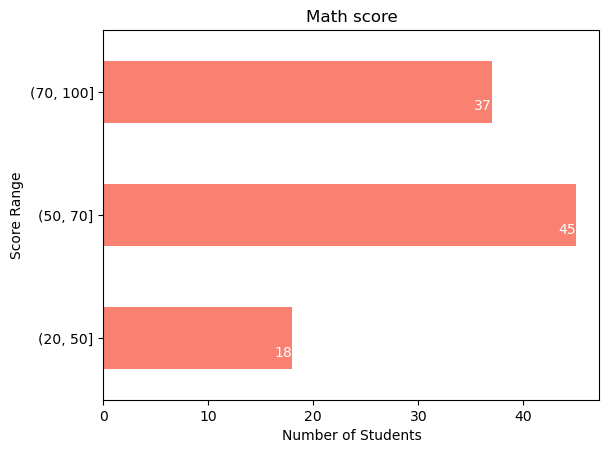

In [212]:
# read csv to Dataframe
df = pd.read_csv('exams.csv')

# bin math score to [20-50, 50-70, 70-100]
df['math bin'] = pd.cut(df['math score'],[20, 50, 70, 100])
df_bin = df['math bin'].value_counts()

# sort by index
df_bin.sort_index(inplace=True)

# Bar plot
df_bin.plot(kind='barh', color='salmon')
plt.title('Math score')
plt.xlabel('Number of Students')
plt.ylabel('Score Range')

# annotate value labels to bar
for index, value in enumerate(df_bin): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, ha='right', xy=(value, index-0.15), color='white')

plt.show()

### Box

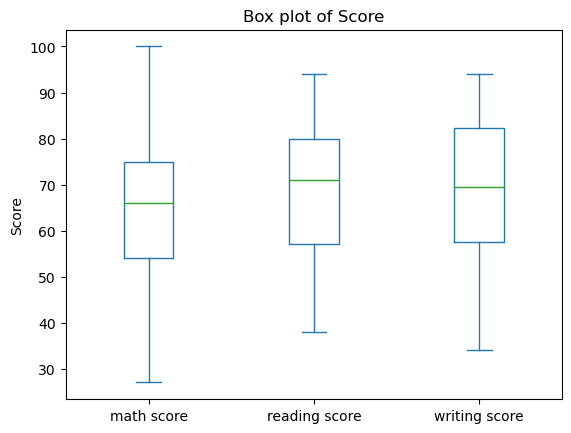

In [217]:
# read data
df = pd.read_csv('exams.csv')
df

# box plot math, reading, writing
df.plot(kind='box', x='gender')
plt.title('Box plot of Score')
plt.ylabel('Score');

### Scatter

* Scatter plot need x and y.
* one plot takes only one y.

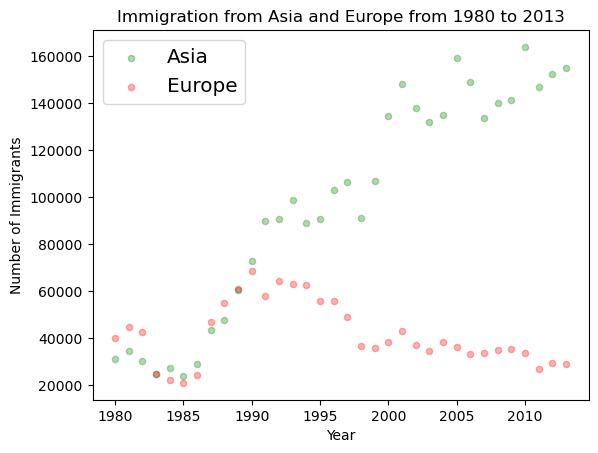

In [277]:
# read data
df = pd.read_csv('immigration.csv')
df.head()

# Scatter plot
ax0 = df.plot(kind='scatter', x='Year', y='Asia', 
              color='green', alpha=0.3)
ax1 = df.plot(kind='scatter', x='Year', y='Europe',
              color='red', alpha=0.3,
              ax=ax0)

ax0.set_title('Immigration from Asia and Europe from 1980 to 2013')
ax0.set_ylabel('Number of Immigrants')
ax0.legend(['Asia', 'Europe'], loc='upper left', fontsize='x-large');

### Bubble

Bubble plot is an extension of scatter plot

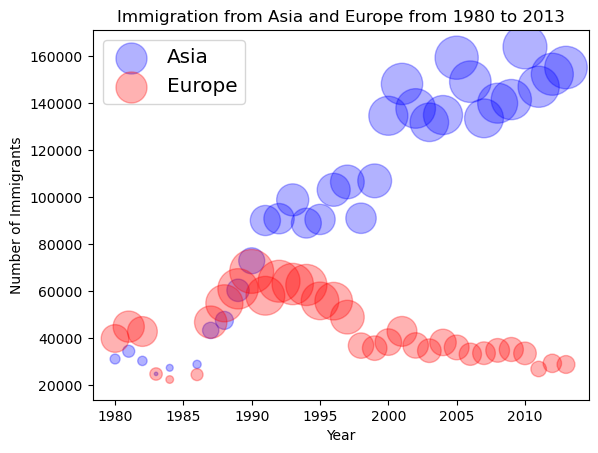

In [283]:
# read data
df = pd.read_csv('immigration.csv')
df.head()

# Normalize
norm_asia = (df['Asia']-df['Asia'].min())/(df['Asia'].max()-df['Asia'].min())
norm_europe = (df['Europe']-df['Europe'].min())/(df['Europe'].max()-df['Europe'].min())

# Scatter plot
ax0 = df.plot(kind='scatter', x='Year', y='Asia', 
              color='blue', alpha=0.3, 
              s=norm_asia *1000)
ax1 = df.plot(kind='scatter', x='Year', y='Europe',
              color='red', alpha=0.3,
              s=norm_europe *1000,
              ax=ax0)

ax0.set_title('Immigration from Asia and Europe from 1980 to 2013')
ax0.set_ylabel('Number of Immigrants')
ax0.legend(['Asia', 'Europe'], loc='upper left', fontsize='x-large');

### Sub plot using Artist layer

In [284]:
# read data
df = pd.read_csv('immigration.csv')
df.head()

,Year,Africa,Asia,Europe,Latin America and the Caribbean,Northern America,Oceania
0,1980,3951,31025,39760,13081,9378,1942
1,1981,4363,34314,44802,15215,10030,1839
2,1982,3819,30214,42720,16769,9074,1675
3,1983,2671,24696,24638,15427,7100,1018
4,1984,2639,27274,22287,13678,6661,878


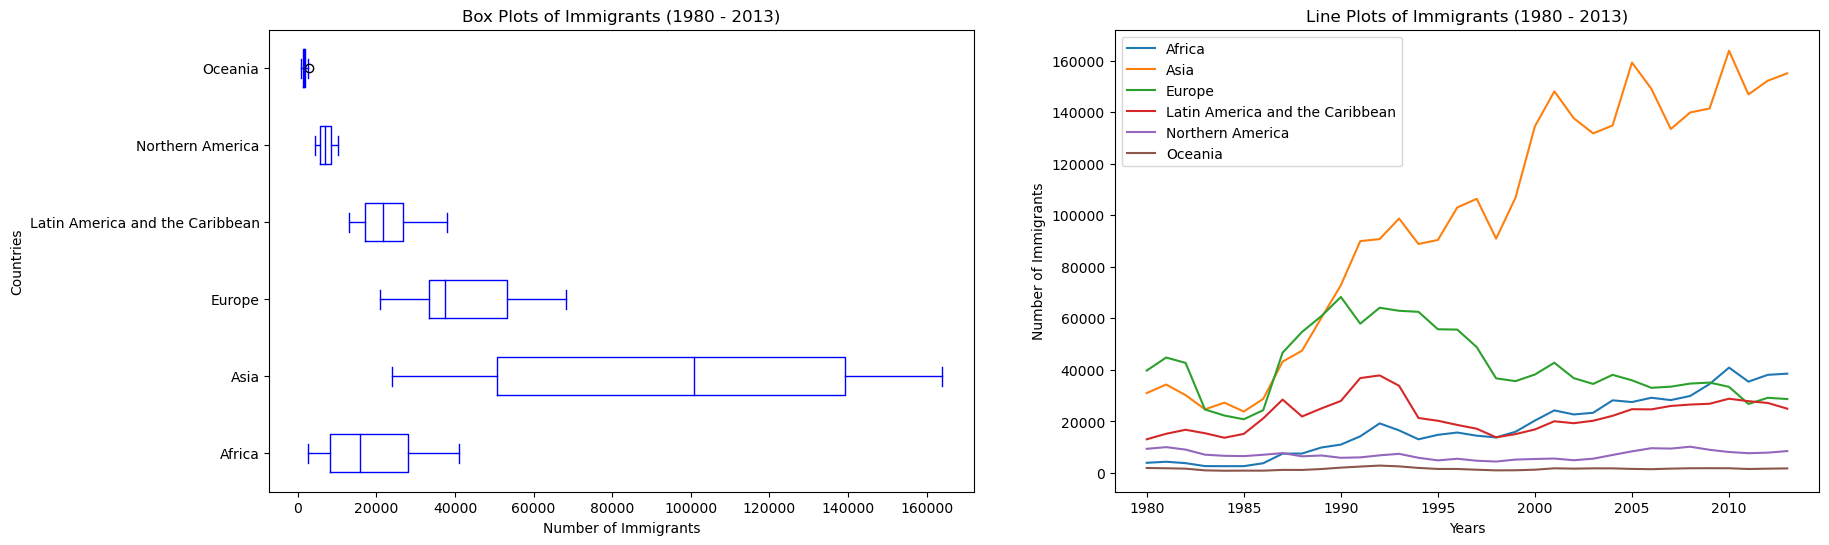

In [289]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df.plot(kind='box',x='Year', color='blue', vert=False, ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df.plot(kind='line',x='Year', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()